*This notebook is my own notes / development playground. It will be disorganized in nature. Feel free to skim through.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import automata as atm
import analysis as ans
from rules import Rules

In [5]:
state = [
    [1, 0, 0, 1],
    [1, 1, 1, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
]
out = ans.play(state, steps = 3, rule = Rules.CONWAY)

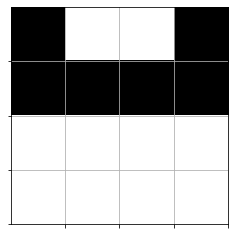

In [24]:
fig, axs = plt.subplots()
axs.imshow(~out[0], cmap = 'gray')
axs.set_xticks(np.arange(len(state))+0.5)
axs.set_yticks(np.arange(len(state))+0.5)
axs.set_xticklabels([])
axs.set_yticklabels([])
axs.grid()
plt.show()

In [5]:
ans.get_alive_matrix(np.array(state))

array([[2., 4., 4., 2.],
       [2., 3., 3., 2.],
       [2., 3., 3., 2.],
       [0., 0., 0., 0.]])

### Cycle Detection

What is a cycle? Intuitively, we understand it as a set of alive cells -- we'll call it a contiguous set
- we define contiguous as existing neighbors -- this means diagonals too

A contiguous set of alive cells that either oscillates with a "pair" set or itself (identity)
- let's call this other set its **complement**

Can we create the fundamental operations for these automata? How can we define these?


Fundamental operations:
- and
    - would this be superimposing a new cycle on top?
- or
- negate
    - we have (cycle complement)
    - this occurs by just updating...
- identity
    - this occurs by just updating...
    
Perhaps some cycles have their complement = identity. This would imply that Updating $\equiv$ negating. No update is identity.
- To call an update a negate is a very shady declaration ... it's not a pure negate
- it is a deterministic function, but I'm sure we can disprove it using boolean logic
    - ie, demonstrate update(A) = A and update(A)
    - A = update(A) or A

Perhaps we define the and/or operations as just the element-wise and/or of two states? What are the properties of these? What do they give us??

Do we need to establish an inverse update? Is it an invertible function? Probably not

In [24]:
state = ans.get_random_state((2, 2))
state

In [26]:
atm.update(state).astype(int)

array([[1, 1],
       [1, 1]])

In [27]:
np.logical_and(atm.update(state), state).astype(int)

array([[1, 1],
       [1, 0]])

In [28]:
np.logical_or(atm.update(state), state).astype(int)

array([[1, 1],
       [1, 1]])

In [7]:
state = ans.get_random_state((5, 5))
state

array([[0, 0, 1, 1, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0]])

In [13]:
np.logical_not(state).astype(int)

array([[1, 1, 0, 0, 1],
       [0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1]])

In [24]:
atm.get_neighbors(0, 0)

array([[-1, -1],
       [ 0, -1],
       [ 1, -1],
       [-1,  0],
       [ 1,  0],
       [-1,  1],
       [ 0,  1],
       [ 1,  1]])

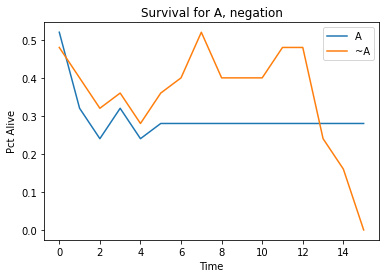

In [22]:
state = ans.get_random_state((5, 5))

total = 15
states = ans.play(state, n = total)
states_neg = ans.play(np.logical_not(state).astype(int), n = total)


plt.plot(ans.get_survival_stats(states)[:, 0] / (state.shape[0] * state.shape[1]))
plt.plot(ans.get_survival_stats(states_neg)[:, 0] / (state.shape[0] * state.shape[1]))
plt.title('Survival for A, negation')
plt.xlabel('Time')
plt.ylabel('Pct Alive')
plt.legend(labels = ['A', '~A'])
plt.show()

### Testing Rule Integration

In [2]:
state = np.array([0,0,0,1,0,0,0]).reshape((1, -1))
state

array([[0, 0, 0, 1, 0, 0, 0]])

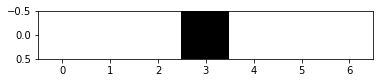

In [16]:
plt.imshow(~state, cmap = 'gray')
plt.show()

In [3]:
out = ans.play(state, steps = 10, rule = Rules.RULE30, verbose = True)

|      ██      |
----------------------------
|    ██████    |
----------------------------
|  ████    ██  |
----------------------------
|████  ████████|
----------------------------
|██    ██    ██|
----------------------------
|██████████████|
----------------------------
|██          ██|
----------------------------
|████      ████|
----------------------------
|██  ██  ██████|
----------------------------


In [4]:
out

array([[[0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 1, 1, 0, 0]],

       [[0, 1, 1, 0, 0, 1, 0]],

       [[1, 1, 0, 1, 1, 1, 1]],

       [[1, 0, 0, 1, 0, 0, 1]],

       [[1, 1, 1, 1, 1, 1, 1]],

       [[1, 0, 0, 0, 0, 0, 1]],

       [[1, 1, 0, 0, 0, 1, 1]],

       [[1, 0, 1, 0, 1, 1, 1]],

       [[1, 0, 1, 0, 1, 0, 1]]])

In [5]:
(1, *state.shape)

(1, 1, 7)